# 3 Виконання

## 3.1 Побудувати стовпчикові діаграми, на яких відобразити 1. кількість діамантів кожного з класів якості; 2. максимальну ціну діамантів кожного класу якості; 3. середню глибину діамантів різного класу якості з різною якістю кольору.

### Для початку імпортуємо модулі pandas, numpy, seaborn та matplotlib. Завантажимо датафрейм та виведемо його вміст. Видалимо колонку індексів, оскільки вона за замовчуванням створюється при конструюванні датафрейму.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/diamonds.csv')
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,'Ideal','E','SI2',61.5,55.0,326,3.95,3.98,2.43
1,0.21,'Premium','E','SI1',59.8,61.0,326,3.89,3.84,2.31
2,0.23,'Good','E','VS1',56.9,65.0,327,4.05,4.07,2.31
3,0.29,'Premium','I','VS2',62.4,58.0,334,4.20,4.23,2.63
4,0.31,'Good','J','SI2',63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
1509,0.81,'Very Good','G','VS2',63.1,58.0,2994,5.88,5.84,3.70
1510,1.24,'Premium','J','I1',61.9,55.0,2994,6.92,6.85,4.26
1511,0.81,'Premium','G','VS2',62.0,58.0,2994,5.95,5.92,3.68
1512,0.81,'Premium','D','SI2',61.7,58.0,2994,5.97,5.93,3.67


*Імпортування модулів та завантаження датасету*

### Побудуємо діаграму кількості діамантів кожного з класів якості. Для цього використаємо метод pd.Series.hist.

<AxesSubplot: >

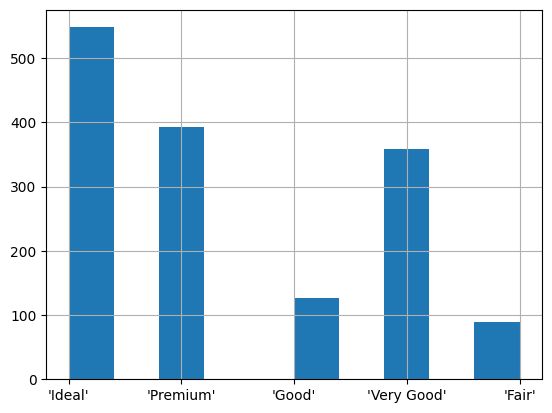

In [69]:
df.cut.hist()

*Діаграма кількості діамантів кожного з класів якості*

### Побудуємо діграму максимальних ціни діамантів кожного класу якості. Зробимо це за допомогою функції sns.barplot, де в аргументи передамо класи якості, у значення їхню максимальну ціну. Максимальну ціну знайдемо, згрупувавши датафрейм та застосувавши функцію max.

In [70]:
dd = df.groupby(by='cut').agg(max)
dd

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
'Fair',1.50,'J','VVS2',69.5,70.0,2993,7.26,7.09,4.70
'Good',1.04,'J','VVS2',65.2,65.0,2990,6.67,6.60,4.03
'Ideal',1.02,'J','VVS2',63.0,60.0,2995,6.53,6.50,3.99
'Premium',1.27,'J','VVS2',63.0,62.0,2994,7.12,7.05,4.26
'Very Good',1.24,'J','VVS2',64.5,64.0,2994,6.85,6.92,4.26


*Знаходження максимальних цін по кожному класу*

### Тепер за цією інформацією нарешті побудуємо діаграму. Зробимо обмеження для осі ординат за допомогою методу set_ylim, передавши в нього кортеж з локального мінімально та максимального значення глобальних максимальних значень по класах.

(2987.0, 2998.0)

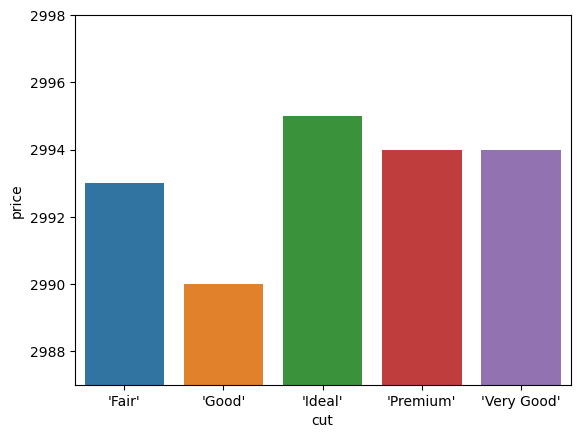

In [71]:
ax = sns.barplot(x=dd.index, y=dd.price)
ax.set_ylim((dd.price.min()-3, dd.price.max()+3))

*Діаграма максимальних ціни діамантів кожного класу якості*

### Побудуємо діаграму середньої глибини діамантів різного класу якості з різною якістю кольору. Також застосуємо функцію sns.barplot, але передамо в параметр за замовчуванням hue - колір.

/tmp/ipykernel_12148/1613217633.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dd = df.groupby(by=['cut', 'color']).agg(np.mean)


(3.0557142857142856, 4.187777777777777)

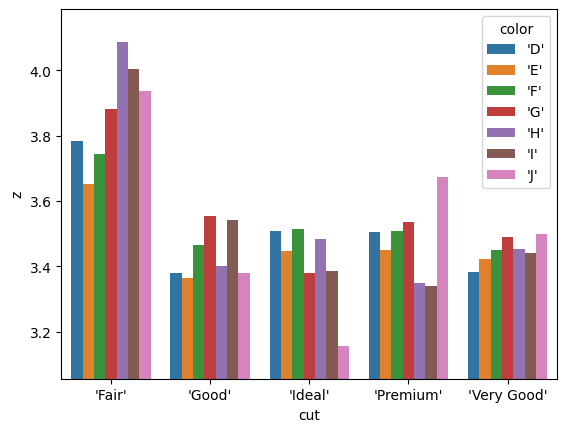

In [72]:
dd = df.groupby(by=['cut', 'color']).agg(np.mean)
dd_index = dd.index.to_frame()
ax = sns.barplot(x=dd_index.iloc[:, 0], y=dd.z, hue=dd_index.iloc[:, 1])
ax.set_ylim((dd.z.min()-0.1, dd.z.max()+0.1))

*Діаграма середньої глибини діамантів різного класу якості з різною якістю кольору*

## 3.2 Побудувати гістограму глибини діамантів у відсотках (depth), загальну і для кожного класу якості. 

### Спочатку подивимося на загальний розподіл, використавши функцію sns.histplot.

<AxesSubplot: xlabel='depth', ylabel='Count'>

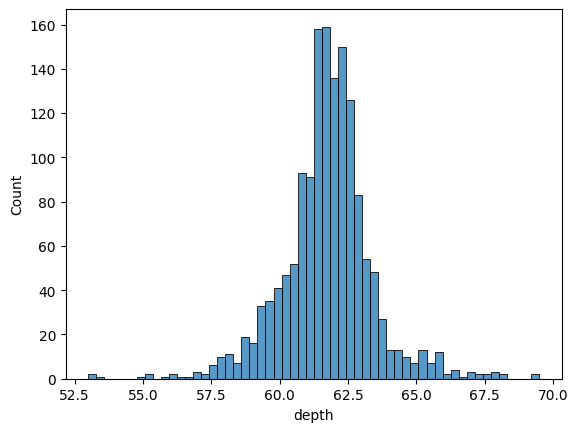

In [73]:
sns.histplot(df['depth'])

*Діаграма загального розподілу глибини діамантів у відсотках*

### Для побудови гістограми застосуємо об'єкт класу sns.FacetGrid, у конструктор якого передаємо необхідні стовпчики. Після цього застосуємо метод map, передавши в нього функцію гістограми sns.histplot та необхідну колонку.

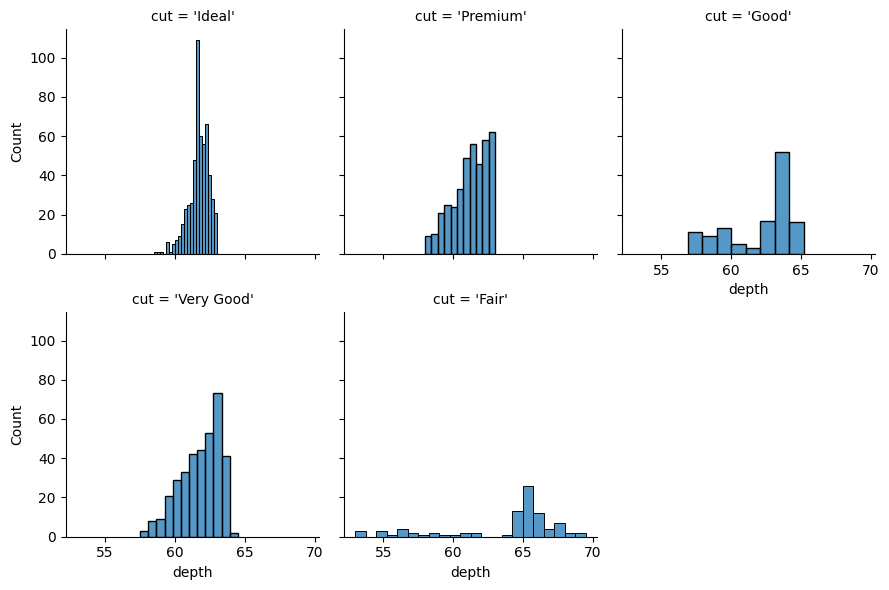

In [74]:
fig = sns.FacetGrid(df[['depth', 'cut']], col='cut',
                    col_wrap=3, height=3)
fig.map(sns.histplot, 'depth')

*Діаграма розподілу глибини діамантів у відсотках для кожного класу якості*

## 3.3 Побудувати діаграму розмаху параметру table (загальну і в залежності від якості кольору), визначити чи присутні викиди.

### Побудуємо діаграму розмаху, застосувавши функцію sns.boxplot. Як бачимо, існують викиди, що не попадають у діапазон. Детальніше їх розглянемо у наступному параграфі.

<AxesSubplot: >

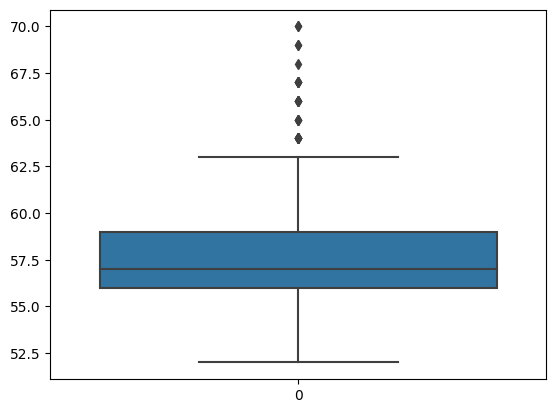

In [78]:
sns.boxplot(df['table'])

*Діаграма розмаху параметру table*

### Побудуємо діаграму розмаху, застосувавши функцію sns.boxplot. Як ми побачимо, що для 'E', 'I', 'H', 'F', 'G', 'D' існують значення, що попадають поза межі T-shaped whiskers, тобто вони не попають у межу, яка більша у 1.5 рази інтерквантирального діапазону.

<AxesSubplot: xlabel='table', ylabel='color'>

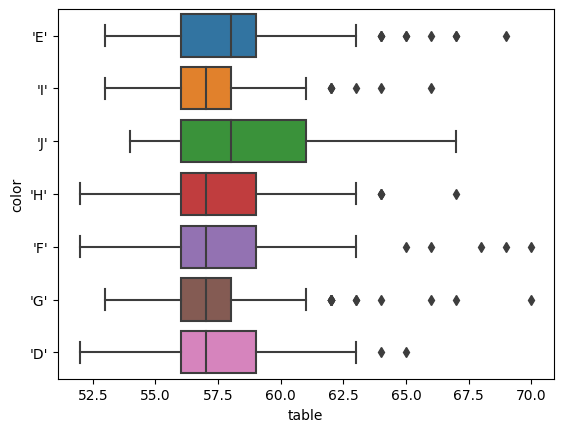

In [77]:
sns.boxplot(x=df['table'], y=df['color'])

*Діаграма розмаху параметру table від якості кольору*

## 3.4 За   допомогою   діаграм   розсіювання   зробити   висновки   щодо залежності  між  1.  довжиною  і  шириною;  2. глибиною  у  %  і глибиною  у  мм. Порахувати  коефіцієнт  кореляції  за  допомогою відповідних функцій.

### Побудуємо діаграму розсіювання за допомогою функції sns.scatterplot. Для початку зобразимо залежність довжини від ширини. Бачимо, що проглядається чітка лінійна залежність між даними величинами.

<AxesSubplot: xlabel='x', ylabel='y'>

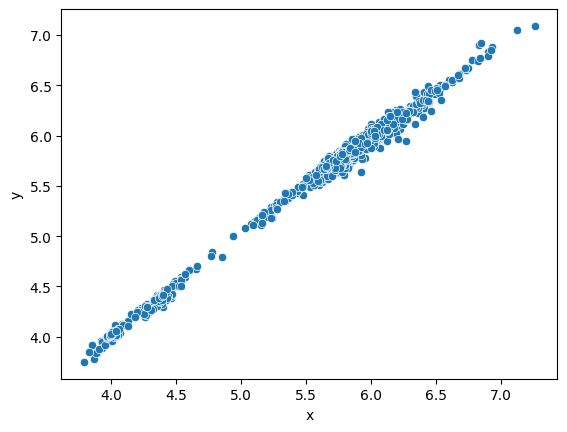

In [80]:
sns.scatterplot(data=df, x='x', y='y')

*Діграма розсіювання довжини від ширини*

### Зобразимо діаграму розсіювання між глибиною у % та глибиною у мм. Зараз складно зробити висновок про залежність величин, тому поглянемо на матрицю кореляцій.

<AxesSubplot: xlabel='depth', ylabel='z'>

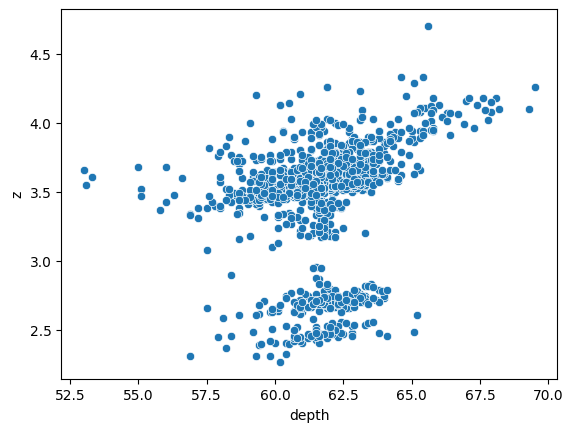

In [81]:
sns.scatterplot(data=df, x='depth', y='z')

*Діграма розсіювання між глибиною у % та глибиною у мм*

### Побудуємо діаграму кореляцій величин між собою за допомогою методу pandas.DataFrame.corr, рузельтат якого передамо до функції sns.heatmap. Побачимо,що кореляція між довжиною та шириною дорівнює одиниці. Однак залежність абсолютної глибини до відносної - 0.23, що свідчить про те, що ці величини мають зв'язок. Низька кореляція пояснюється тим, що глибина у відсотках залежить також від інших глибин діамантів, у той час як абсолютна глибина показує конкретне число.

/tmp/ipykernel_12148/1369575642.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=axis, annot=True)


<AxesSubplot: >

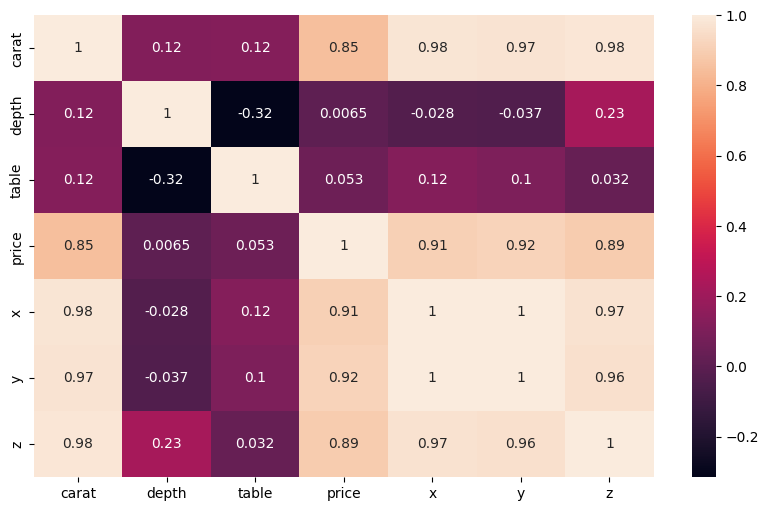

In [82]:
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), ax=axis, annot=True)

*Матриця кореляцій*